## Connecting resolved photometry code to Prospector models
started: May 3rd 2019, by: Shooby

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys, os
import h5py
import scipy
import sedpy
import prospect

%matplotlib inline

In [16]:
def build_dict_obs(mags,emags):
    '''get magnitude and error (AB) in GOODS_S HST filters and convert 
    to SED dictionary format readable by prospector'''
    
    from prospect.utils.obsutils import fix_obs
    obs = {}
    filternames = ['acs_wfc_f435w', 'acs_wfc_f606w','acs_wfc_f775w','acs_wfc_f850lp','wfc3_ir_f105w','wfc3_ir_f125w','wfc3_ir_f160w']
    obs["filters"] = sedpy.observate.load_filters(filternames)
    obs["maggies"] =  10.0**((23.9-mags)/2.5 - 6.0)/3631.0 #flux unit (maggies)
    obs["maggies_unc"] = (0.921*emags*obs['maggies'])  # uncertainties
    obs["phot_mask"] = [True,True,True,True,True,True,True] #filters to use in the fit
    obs["phot_wave"] = [4317,5918,7693,9055,10550,12486,15370] #effective wavelengths
    obs = fix_obs(obs)

    return obs

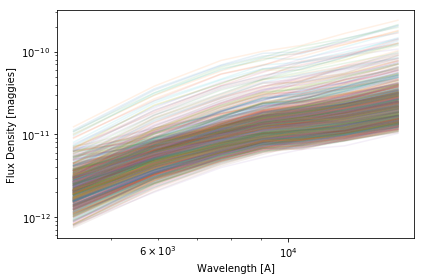

In [11]:
gal_phot = np.genfromtxt('galcat/gal_53.1875688-27.9109903.cat')

for b in range(len(gal_phot[:])):

    mags = np.array([gal_phot[b,1],gal_phot[b,3],gal_phot[b,5],gal_phot[b,7],
                     gal_phot[b,9],gal_phot[b,11],gal_phot[b,13]])
    emags = np.array([gal_phot[b,2],gal_phot[b,4],gal_phot[b,6],gal_phot[b,8],
                     gal_phot[b,10],gal_phot[b,12],gal_phot[b,14]])
    
    obs=build_dict_obs(mags,emags)
    plt.plot(obs['phot_wave'],obs['maggies'],alpha=0.1)

plt.xlabel('Wavelength [A]')
plt.ylabel('Flux Density [maggies]')
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig('example_resolved_seds.png')

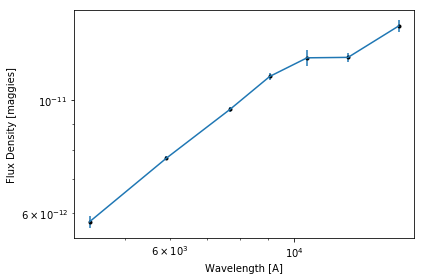

In [25]:
b=1
mags = np.array([gal_phot[b,1],gal_phot[b,3],gal_phot[b,5],gal_phot[b,7],gal_phot[b,9],gal_phot[b,11],gal_phot[b,13]])
emags = np.array([gal_phot[b,2],gal_phot[b,4],gal_phot[b,6],gal_phot[b,8],gal_phot[b,10],gal_phot[b,12],gal_phot[b,14]])
obs=build_dict_obs(mags,emags)

plt.plot(obs['phot_wave'],obs['maggies'],'k.')
plt.errorbar(obs['phot_wave'],obs['maggies'],yerr=obs['maggies_unc'])
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux Density [maggies]')
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig('example_resolved_seds.png')